## Ex. 08
## Diego Souza Lima Marques - TIA: 32039921

# 4. Clustering

A análise de *clusters* tem como objetivo dividir o conjunto de dados de entrada em grupos de instâncias relacionadas, de forma que instâncias no mesmo grupo (*cluster*) são mais próximas entre si do que entre instâncias que pertencem a outros grupos. A aula deve fornecer exemplos da aplicação de diferentes técnicas de *clustering* utilizando a biblioteca `scikit-learn`.

Extraído [do material auxiliar do livro Introduction to Data Mining](http://www.cse.msu.edu/~ptan/dmbook/software/).


## 4.1. Antes de começar

Antes de começar, reveja os objetivos, recursos e configure o ambiente para execução.

### 4.1.1. Ao final da aula, o aluno será capaz de

* Aplicar clustering com K-means
* Aplicar clustering hierárquico
* Aplicar clustering baseado em densidade com DBSCAN

### 4.1.2. Recursos

* _Chapter 7 - Cluster Analysis: Basic Concepts and Algorithms_ do livro [_Introduction to Data Mining_](https://www-users.cs.umn.edu/~kumar001/dmbook/index.php)
* Documentação do Pandas: https://pandas.pydata.org/
* Documentação do scikit-learn: https://scikit-learn.org/stable/user_guide.html
* George Karypis, Eui-Hong Han, and Vipin Kumar. CHAMELEON: A Hierarchical Clustering Algorithm Using Dynamic Modeling. IEEE Computer 32(8): 68-75, 1999.


### 4.1.3. Configuração



## 4.2. Clustering com K-means

O algoritmo K-means representa cada grupo em função do seu centróide. Sua implementação envolve dividir o conjunto de dados em `k` partições disjuntas iterativamente aplicando os seguintes passos:

1. Construir `k` *clusters* atribuindo cada instância ao seu ceontróide mais próximo (**atribuição**);
2. Recalcular o centróide de cada *cluster* (**recálculo**).

O exemplo aplica o algoritmo K-means a um exemplo simples com dados de avaliações de filmes.

In [59]:
import pandas as pd

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


No exemplo acima, os três primeiros usuários gostavam de filmes de ação (`Star Wars` e `Jaws`), enquanto os últimos três gostavam de filmes de terror (`Exorcist` e `Omen`). O objetivo é aplicar o algoritmo K-means ara identificar grupos de usuários que tenham preferências semelhantes.

Aplicamos o K-means para criar um cluster com `k=2` no conjunto de dados de avaliações de filmes. É necessário antes remover a coluna `user`, já que o algoritmo só utiliza dados numéricos.

In [60]:
from sklearn.cluster import KMeans

In [61]:
data = movies.drop(['user'], axis=1)

In [62]:
data

,Jaws,Star Wars,Exorcist,Omen
0,5,5,2,1
1,4,5,3,2
2,4,4,4,3
3,2,2,4,5
4,1,2,3,4
5,2,1,5,5


In [66]:
k_means = KMeans(n_clusters=2, random_state=1)

In [67]:
k_means.fit(data)

KMeans(n_clusters=2, random_state=1)

In [68]:
k_means.labels_

array([1, 1, 1, 0, 0, 0])

In [69]:
clusters = pd.DataFrame(data=k_means.labels_, index=movies['user'], columns=['Cluster ID'])
clusters

,Cluster ID
user,
john,1
mary,1
bob,1
lisa,0
lee,0
harry,0


In [ ]:
# Output desejado

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster ID
user,
john,1
mary,1
bob,1
lisa,0
lee,0
harry,0


Observe que o algoritmo atribuiu os três primeiros usuários a um cluster e os três últimos a outro, conforme esperado. Também é possível visualizar o centróide calculado para cada um dos clusters.

In [70]:
# Observação: apenas inverteu-se a ordem dos clusters, os dois resultados são os mesmos
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,1.666667,1.666667,4.0,4.666667
1,4.333333,4.666667,3.0,2.000000


In [ ]:
# Output desejado
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,4.333333,4.666667,3.0,2.000000
1,1.666667,1.666667,4.0,4.666667


Observe que o cluster 0 possui avalições maiores para os filmes de terro, enquanto no cluster 1 os filmes de ação estão mais bem avaliados. Os centróides do cluster podem ser aplicados a novos usuários para determinar em qual cluster se encaixam.

In [71]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])

In [72]:
results = k_means.predict(testData)
results

C:\Users\Diego\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 0, 1, 0, 1])

In [73]:
test_result = pd.DataFrame(testData, columns=data.columns)
test_result

,Jaws,Star Wars,Exorcist,Omen
0,4,5,1,2
1,3,2,4,4
2,2,3,4,1
3,3,2,3,3
4,5,4,1,4


In [74]:
test_result['user'] = ['paul', 'kim', 'liz', 'tom', 'bill']
test_result['Cluster ID'] = results

In [75]:
test_result = test_result[['user', 'Jaws', 'Star Wars', 'Exorcist', 'Omen', 'Cluster ID']]
test_result

,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,1
1,kim,3,2,4,4,0
2,liz,2,3,4,1,1
3,tom,3,2,3,3,0
4,bill,5,4,1,4,1


In [ ]:
# Output desejado

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,1
1,kim,3,2,4,4,0
2,liz,2,3,4,1,1
3,tom,3,2,3,3,0
4,bill,5,4,1,4,1


Para encontrar o melhor número de clusters para os dados, podemos aplicar o k-means e calcular a soma do erro quadrático médio (*sum-of-squared errors*) - SSE. A curva que mostra o cálculo do SSE versus o número de clusters.

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Diego\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


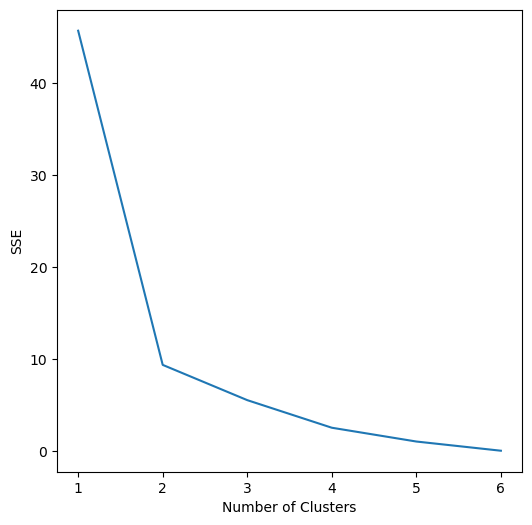

In [81]:
sse = []

for k in range(1, 7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot([1, 2, 3, 4, 5, 6], sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'SSE')

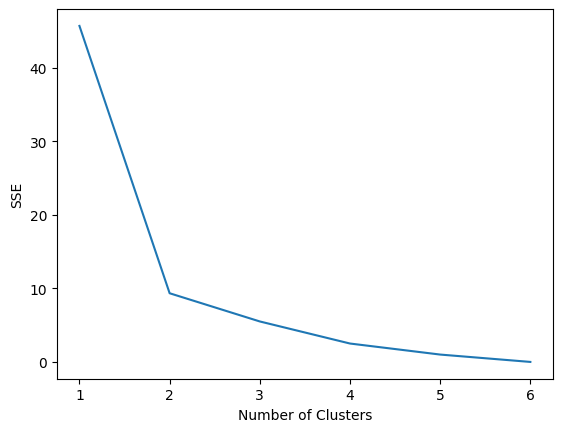

In [ ]:
# Output desejado

Observe que o SSE sofre uma queda brusca quando o número de clusters chega a 2, indicando uma medida provável para o número de clusters.

## 4.3. Cluster hierárquico

Utilizamos o dataset de vertebrados para construir os exemplos de cluster hierárquico. Os resultados levam em consideração três algoritmos para construção do cluster hierárquico fornecidos pelo `scipy`:

1. *single link* (MIN)
2. *complete link* (MAX)
3. *group average*

In [82]:
import pandas as pd

data = pd.read_csv('http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial6/vertebrate.csv', header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


### 4.3.1. Single Link (MIN)

In [83]:
from scipy.cluster import hierarchy

In [84]:
tree = data['Name']
tree

0             human
1            python
2            salmon
3             whale
4              frog
5            komodo
6               bat
7            pigeon
8               cat
9     leopard shark
10           turtle
11          penguin
12        porcupine
13              eel
14       salamander
Name: Name, dtype: object

In [85]:
X = data.drop(['Name', 'Class'], axis=1)
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [86]:
Y = data['Class']
Y

0        mammals
1       reptiles
2         fishes
3        mammals
4     amphibians
5       reptiles
6        mammals
7          birds
8        mammals
9         fishes
10      reptiles
11         birds
12       mammals
13        fishes
14    amphibians
Name: Class, dtype: object

In [89]:
clusters = hierarchy.linkage(X, 'single')
clusters

array([[ 0.        ,  8.        ,  0.        ,  2.        ],
       [ 2.        , 13.        ,  0.        ,  2.        ],
       [ 4.        , 14.        ,  0.        ,  2.        ],
       [12.        , 15.        ,  1.        ,  3.        ],
       [ 6.        , 18.        ,  1.        ,  4.        ],
       [ 3.        ,  9.        ,  1.        ,  2.        ],
       [16.        , 20.        ,  1.        ,  4.        ],
       [10.        , 21.        ,  1.        ,  5.        ],
       [17.        , 22.        ,  1.        ,  7.        ],
       [ 5.        , 23.        ,  1.        ,  8.        ],
       [11.        , 24.        ,  1.        ,  9.        ],
       [19.        , 25.        ,  1.41421356, 13.        ],
       [ 1.        , 26.        ,  1.41421356, 14.        ],
       [ 7.        , 27.        ,  1.41421356, 15.        ]])

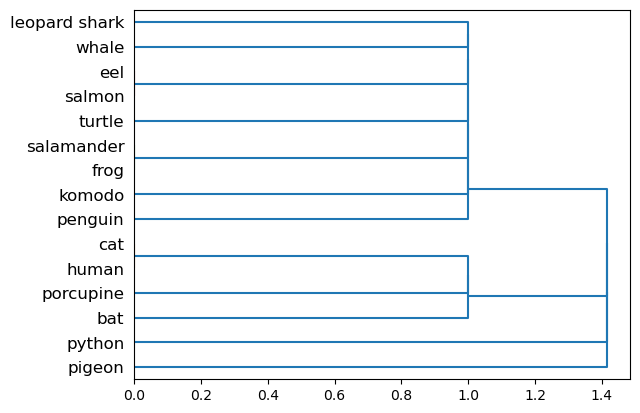

In [91]:
graph = hierarchy.dendrogram(clusters, labels=tree.tolist(), orientation='right')

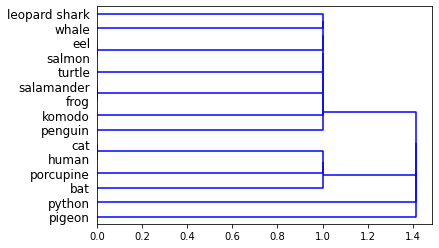

In [ ]:
# Output desejado

### 4.3.2. Complete Link (MAX)

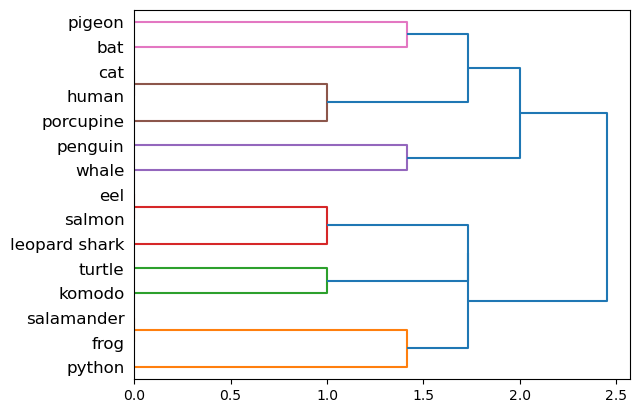

In [95]:
clusters = hierarchy.linkage(X, 'complete')
graph = hierarchy.dendrogram(clusters, labels=tree.tolist(), orientation='right')

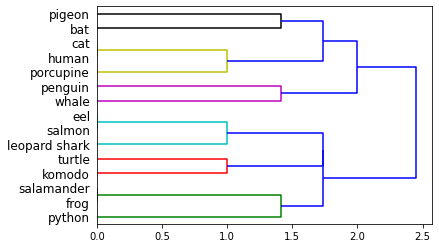

In [ ]:
# Output desejado

### 4.3.3. Group Average

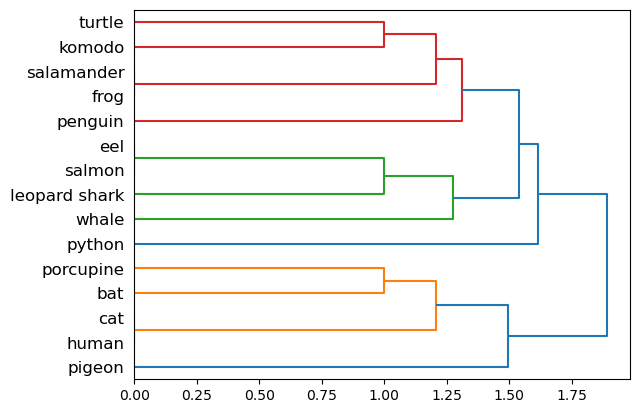

In [96]:
clusters = hierarchy.linkage(X, 'average')
graph = hierarchy.dendrogram(clusters, labels=tree.tolist(), orientation='right')

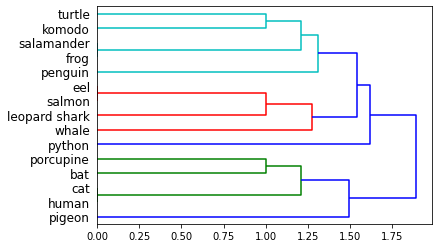

In [ ]:
# Output desejado

In [97]:
hierarchy.leaves_list(clusters)

array([ 7,  0,  8,  6, 12,  1,  3,  9,  2, 13, 11,  4, 14,  5, 10],
      dtype=int32)

In [ ]:
# Output desejado
hierarchy.leaves_list(Z)

array([ 7,  0,  8,  6, 12,  1,  3,  9,  2, 13, 11,  4, 14,  5, 10],
      dtype=int32)

## 4.4. Cluster baseado em densidade

Os clusters baseados em densidade identificam os grupos individuais como regiões de alta densidade separadas por regiões de baixa densidade. O algoritmo DBSCAN é um dos mais populares para cluster baseado em densidade. No DBSCAN os pontos de dados são classificados em três tipos: pontos de núcleo, pontos de borda e pontos de ruído, de acordo com a densidade dos vizinhos próximos. A densidade dos vizinhos próximos é calculada através de dois parâmetros: raio da vizinhança (`eps`) e número mínimo de pontos na vizinhança (`min_samples`).

Para utilizar essa abordagem utilizaremos um conjunto de dados bidimensional com bastante ruído criado por Karypis et al. para avaliar o seu algoritmo CHAMELEON. O código a seguir vai carregar e desenhar a distribuição de dados.

<AxesSubplot:xlabel='x', ylabel='y'>

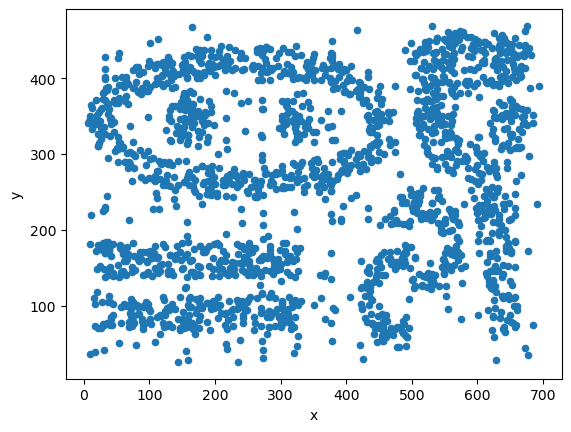

In [98]:
import pandas as pd

data = pd.read_csv('http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial8/chameleon.data', delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

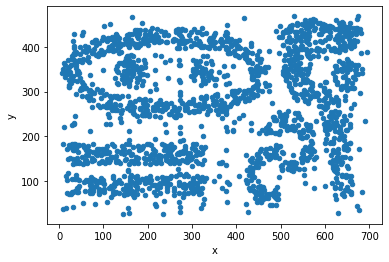

In [ ]:
# Output desejado
import pandas as pd

data = pd.read_csv('http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial8/chameleon.data', delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

Aplicamos o algoritmo DBSCAN ajustando o raio da vizinhança (`eps`) para 15,5 e o número mínimo de pontos (`minimum_samples`) para 5. Serão atribuidos IDs de 0 a 8 aos clusters, enquando os pontos de ruído recebem um ID de cluster igual a -1.

In [99]:
from sklearn.cluster import DBSCAN

In [102]:
db = DBSCAN(eps=15.5, min_samples=5).fit(data)
db

DBSCAN(eps=15.5)

In [103]:
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
labels

,Cluster ID
0,4
1,0
2,1
3,2
4,3
...,...
1966,4
1967,3
1968,3
1969,4


In [104]:
result = data
result['Cluster ID'] = db.labels_
result

,x,y,Cluster ID
0,650.914,214.888,4
1,41.767,179.408,0
2,509.126,233.749,1
3,486.403,152.427,2
4,46.883,367.904,3
...,...,...,...
1966,631.430,210.478,4
1967,187.652,247.923,3
1968,124.996,264.847,3
1969,522.511,302.785,4


<AxesSubplot:xlabel='x', ylabel='y'>

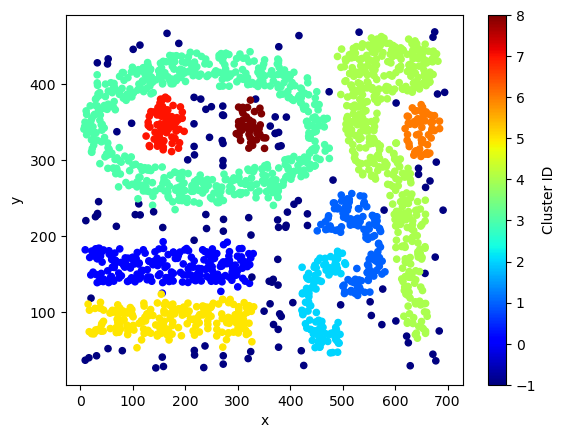

In [106]:
result.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet')

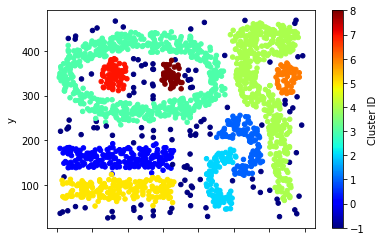

In [ ]:
# Output desejado

In [101]:
# Referências: material do enunciado